<a href="https://colab.research.google.com/github/yeqinghuang516/UCSD-ECE285-Object-Detection-Using-Deep-Learning/blob/master/YOLO/YOLOv3_Detect_Demo_Sageband.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## It is suggested to run this notebook on Colab

## Git clone the repository and install the requirments

In [0]:
! git clone https://github.com/yeqinghuang516/UCSD-ECE285-Object-Detection-Using-Deep-Learning.git
% cd UCSD-ECE285-Object-Detection-Using-Deep-Learning
! sudo pip3 install -r YOLO/requirements.txt

In [0]:
import os
import sys
import time
sys.path.append('/content/UCSD-ECE285-Object-Detection-Using-Deep-Learning/YOLO/')

from models import *
from utils.utils import *

from PIL import Image
from torchvision import datasets
import torchvision as tv
from download_weights import download_file_from_google_drive

## Setting up parameters for detecting

In [0]:
model_def = 'YOLO/config/yolov3.cfg' #path to model definition file
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Download and Initialize datasets

In [6]:
root = 'data'
download = not os.path.isdir(root + '/VOCdevkit/')
print('download = ', download)
testset = datasets.VOCDetection(root, year='2012', image_set='val', download = download)

download =  False


## Download the pretrained weight stored in google drive

In [0]:
file_id = '1-3n6-StK6C-ETzggfyv8qJvzjEKXF67A'
destination = 'YOLO/yolov3_weight.pth'
download_file_from_google_drive(file_id, destination)
pretrained_weights = '/content/UCSD-ECE285-Object-Detection-Using-Deep-Learning/YOLO/yolov3_weight.pth'

## Initiate model

In [8]:
model = Darknet(model_def, loss_mode = "modified").to(device)

checkpoint = torch.load(pretrained_weights)
model.load_state_dict(checkpoint['net'])
print('load state dict')

The loss mode is modified
load state dict


## Detection Demo


Performing object detection:
	+ Label: bottle, Conf: 0.99891
	+ Label: person, Conf: 0.99885
	+ Label: person, Conf: 0.99836
	+ Label: person, Conf: 0.99963


<Figure size 432x288 with 0 Axes>

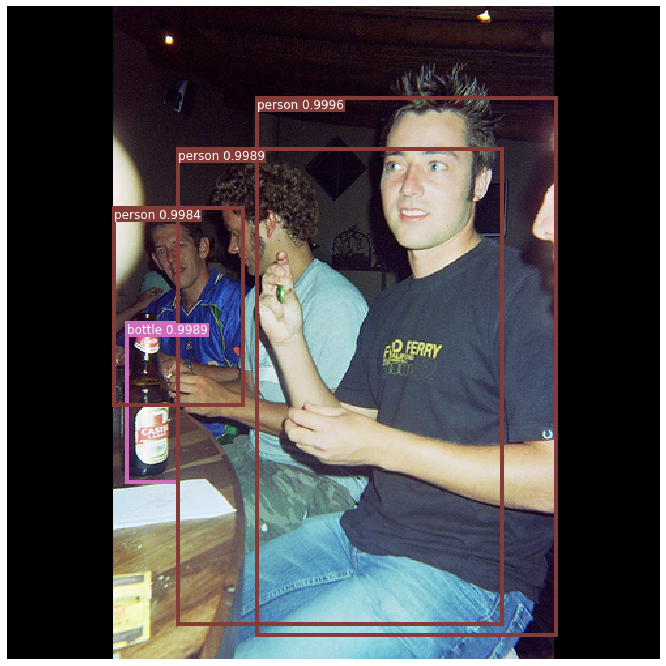

In [25]:
image, _ = testset[9]
Detect(image, model)